# Praktikum 2


Mengimpor Library

In [ ]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Mengimpor Dataset:

Pastikan sudah mendownload file CSV 'Posisi_gaji.csv' dan letakkan dalam direktori yang sama. Ini adalah dataset yang akan digunakan dalam praktikum ini.

Membaca dataset menggunakan pd.read_csv dan memilih fitur (variabel independen X) dan target (variabel dependen y).

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Posisi_gaji.csv to Posisi_gaji.csv


In [ ]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja


Feature Scaling:

Menggunakan StandardScaler untuk melakukan penskalaan fitur X dan target y. Ini diperlukan karena SVM sangat sensitif terhadap skala data.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))


Fitting SVR ke Dataset:

Lakukan pembuatan model SVR dengan kernel RBF (Radial Basis Function) dan melatihnya dengan data yang telah di-scaled.


In [ ]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Visualisasi Hasil SVR:

langkah selanjutkan, lakukan visualisasi Menggunakan grafik untuk memvisualisasikan hasil prediksi model SVR. Ini mencakup plotting data asli (titik-titik merah) dan kurva hasil prediksi (garis biru) untuk tingkat posisi yang bervariasi.

/tmp/ipython-input-1841224750.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


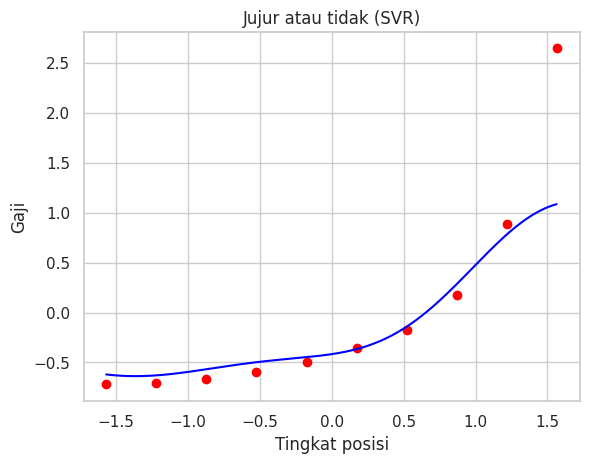

In [ ]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

Prediksi Hasil:

Membuat array 2D yang berisi tingkat posisi yang akan diprediksi. Dalam contoh ini, tingkat posisi 6.5.

Menskalakan fitur prediksi menggunakan sc_X.transform.

Melakukan prediksi menggunakan model SVR yang telah dilatih.

Mengembalikan hasil prediksi ke dalam skala aslinya menggunakan sc_y.inverse_transform.

In [ ]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

Menampilkan Hasil:

Menampilkan hasil prediksi gaji untuk tingkat posisi 6.5 dalam kode

In [ ]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


-	Grafik SVR:
-	Pada grafik tersebut, titik-titik merah mewakili data pengamatan asli yang digunakan untuk melatih model.
-	Garis biru adalah hasil dari prediksi model SVR. Garis ini mencoba untuk mengikuti pola data asli sebaik mungkin dan merupakan representasi dari hubungan non-linear antara tingkat posisi dan gaji.
-	Hasil prediksi yang ditampilkan adalah prediksi gaji untuk tingkat posisi 6.5. Hasilnya adalah sekitar 170,370.02 dolar. Ini berarti model SVR memperkirakan bahwa seseorang dengan tingkat posisi 6.5 akan memiliki gaji sekitar $170,370.02 berdasarkan pola hubungan yang ditemukan dalam data latihan.
-	Grafik ini memvisualisasikan bagaimana model SVR mencoba untuk menyesuaikan diri dengan data yang ada dan memberikan prediksi yang sesuai berdasarkan tingkat posisi yang diberikan (6.5 dalam hal ini). Dalam prakteknya, Anda dapat menggunakan model ini untuk membuat prediksi gaji berdasarkan tingkat posisi lainnya dengan mengganti nilai tingkat_posisi_prediksi.


Evaluasi Model SVR

Langkah terakhir adalah melakukan evaluasi model meliputi MAE, MSE dan R-squared

In [ ]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


# Tugas Praktikum

Multiple Linear Regression dengan Dataset Medical Cost Personal Datasets

Import Library

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Persiapan Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance (1).csv to insurance (1) (1).csv


In [ ]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'insurance(1).csv' dalam direktori yang sama)
data = pd.read_csv('insurance.csv')

# Tugas 1 : Multiple Linear Regression

1.
Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

**Jawab:**

Dataset ini berisi informasi tentang biaya medis seseorang berdasarkan faktor variabel seperti age, sex, bmi body mens index atau indikator berat badan terhadap tinggi, children atau jumlah anak yang ditanggung, smoker/perokok, region atau wilayah tempat tingaal, dan charges atau biaya medis personal

In [ ]:
# Melihat informasi kolom
data.info()

# Melihat statistik deskriptif
data.describe()

# Variabel target: 'charges'
# Variabel bebas (fitur): kolom lain selain 'charges'
X = data.drop('charges', axis=1)
y = data['charges']

# Jika ada kolom kategorikal (misalnya sex, smoker, region), ubah menjadi numerik
X = pd.get_dummies(X, drop_first=True)
X.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

**Jawab:**

Data dibagi menjadi 80% data latih dan 20% data uji untuk memastikan model bisa diuji dengan data yang belum pernah dilihat sebelumnya.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Visualisasi

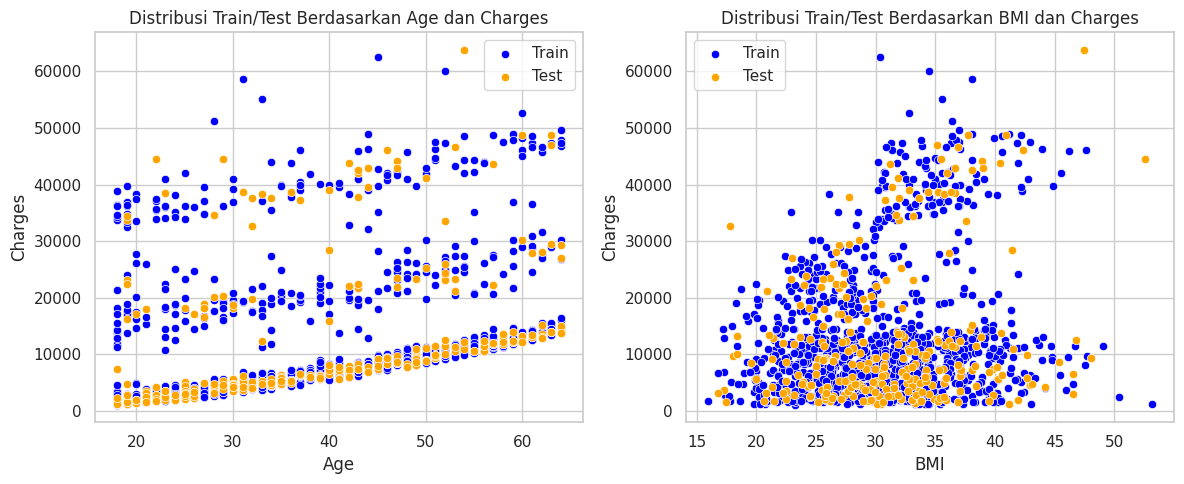

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gabungkan kembali X_train dan y_train untuk visualisasi
train_df = pd.DataFrame(X_train, columns=X.columns)
train_df['charges'] = y_train.values

test_df = pd.DataFrame(X_test, columns=X.columns)
test_df['charges'] = y_test.values

# Pilih beberapa fitur utama untuk divisualisasikan
plt.figure(figsize=(12, 5))

# Visualisasi hubungan age vs charges
plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y='charges', data=train_df, color='blue', label='Train')
sns.scatterplot(x='age', y='charges', data=test_df, color='orange', label='Test')
plt.title('Distribusi Train/Test Berdasarkan Age dan Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

# Visualisasi hubungan BMI vs charges
plt.subplot(1, 2, 2)
sns.scatterplot(x='bmi', y='charges', data=train_df, color='blue', label='Train')
sns.scatterplot(x='bmi', y='charges', data=test_df, color='orange', label='Test')
plt.title('Distribusi Train/Test Berdasarkan BMI dan Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()


3. Lakukan feature scaling jika diperlukan.

**Jawab:**

Data dilakukan feature scalling untuk membantu agar semua variabel berada dalam skala yang sama, terutama penting untuk algoritma berbasis jarak dan gradient descent.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


4. Buat model multiple linear regression menggunakan Scikit-Learn.

**Jawab:**

Model Multiple Linear Regression dibuat menggunakan LinearRegression() dari Scikit-Learn, kemudian dilatih menggunakan data training yang sudah diskalakan.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

5.
Latih model pada data latih dan lakukan prediksi pada data uji.

**Jawab:**

Hasilnya pada

MSE menunjukkan rata-rata selisih kuadrat antara prediksi dan nilai aktual. dimana semakin kecil semakin baik

MAE menunjukkan rata-rata selisih absolut antara prediksi dan nilai aktual dimana lebih mudah diinterpretasikan karena satuannya sama dengan target (charges).

R² (R-squared) menunjukkan proporsi variasi pada charges yang bisa dijelaskan oleh fitur dimana semakin mendekati 1, semakin baik model menjelaskan data.

In [ ]:
# Prediksi data uji
y_pred = model.predict(X_test_scaled)

# Hitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 33596915.85
Mean Absolute Error (MAE): 4181.19
R-squared (R²): 0.7836


Visualisasi:

Pada visualisasi scatter plot untuk actual vs predicted menunjukkan seberapa baik model memprediksi charges dengan hasil titik-tik yang mendekati garis merah diagonal menunjukkan prediksi akurat.

Pada visualisasi residual plot menunjukkan selisih antara nilai aktual dan prediksi dengan pola acak sekitar garis 0 menandakan model bekerja baik.

Pada histogram Error menunjukkan sebaran kesahalan model.

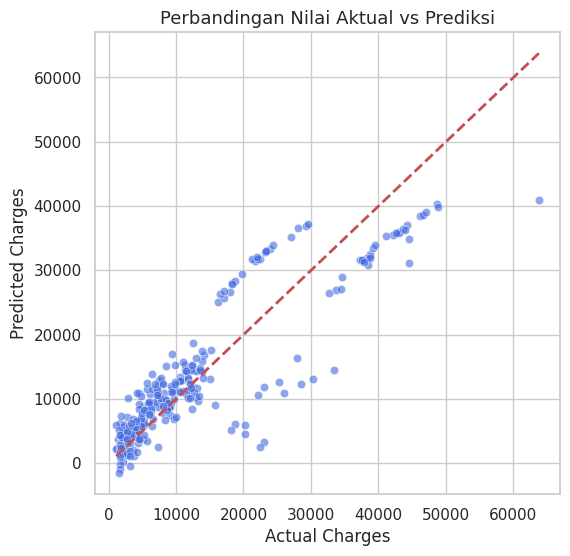

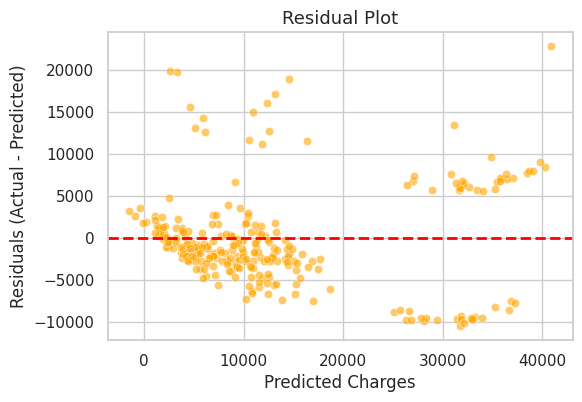

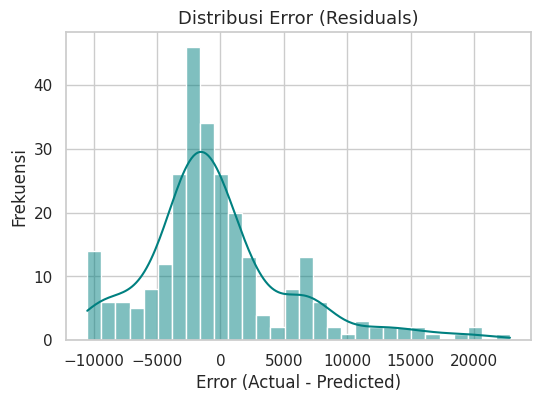

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Nilai Aktual vs Prediksi
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='royalblue', edgecolor='white')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Perbandingan Nilai Aktual vs Prediksi', fontsize=13)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

# Residual Plot (Kesalahan Prediksi)
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, color='orange', edgecolor='white')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residual Plot', fontsize=13)
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

# Distribusi Error (Histogram)
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True, color='teal')
plt.title('Distribusi Error (Residuals)', fontsize=13)
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frekuensi')
plt.show()


Analisis Hasil Tugas Praktikum

Hasil kesimpulan analisis dari tugas praktikum diatas adalah odel multiple linear regression mampu memprediksi biaya medis personal dengan tingkat akurasi yang baik. dengan faktor yang mempengaruhi adalah smoker, age, dan bmi.